# Linear regression:
"A machine learning model where we input data and obtain a numerical prediction as the output"

**Mathematically:** Suppose we have training examples (xi, yi) Plotting them on a coordinate plane gives us a set of points (dots). The goal of linear regression is to compute a line (or hyperplane in higher dimensions) that best fits these points.

Now, in realistic datasets, the points are usually scattered, so the best-fit line will not pass through all the points. Instead, it minimizes the overall error (distance) between the predicted values and the actual data points.

Let’s represent the model as
𝑌
, with weights
𝑤
 and bias
𝑏
:

The weights (
𝑤
) are parameters that scale the input features.

The bias (
𝑏
) is the intercept term, shifting the line up or down.

The linear regression equation can be written as:

***Y=w1​x1​+w2​x2​+…+wn​xn​+b***

Here, both
𝑤 and
𝑏
 are parameters that must be learned (adjusted).

To express this more compactly using matrix notation:

***Y=W.T@X***

where:
1. W is a parameter vector [b,w1,w2,...,wn]
2. X is an input matrix of [1,x1,x2,...,xn]


# 1. ***Data Cleaning and Preparation***
---

1.   Loading Data
2.   Handling Missing Values
3.   Data Transformation
4.   Data Splitting

In [1]:
import kagglehub
path = kagglehub.dataset_download("yasserh/housing-prices-dataset")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'housing-prices-dataset' dataset.
Path to dataset files: /kaggle/input/housing-prices-dataset


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

**importing necessary libraries**

NumPy (for numerical evaluation)
Pandas (to manipulate datasets)
MatPlotLib (for visualization of data)
sklearn (for data transformation and other preprocessing operations)

In [14]:
import zipfile as z
zp=z.ZipFile(r'/content/archive (4).zip')
zp.extractall()
zp.close()

In [16]:
# loading dataset
dataset=pd.read_csv(r'/content/Housing.csv')

In [17]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [18]:
dataset.shape

(545, 13)

It indicates that the given dataset has:

Total Rows= 545
Total Columns= 13

# 1.2. Handling Missing Values

*   List item
*   List item




---

* Identify and handle missing values in both datasets.
* Provide a justification for the methods used to handle missing data.

In [19]:
#getting missing values
na_col=dataset.isnull().sum()
na_row= dataset.isnull().sum(axis=1)

In [20]:
#printing stats of missing values
print(f"The number of missing values in columns are:\n{na_col}")
print(f"\n{'-'*50}\n")
print(f"The number of missing values in rows are:\n{na_row}")

The number of missing values in columns are:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

--------------------------------------------------

The number of missing values in rows are:
0      0
1      0
2      0
3      0
4      0
      ..
540    0
541    0
542    0
543    0
544    0
Length: 545, dtype: int64


If the data has missing value this could be done:

#dropping the rows with missing values
dropped_df=dataset.copy()

dropped_df.dropna(axis=0,inplace=True)

print(f"The shape of new dataset after dropping the rows with missing values is:\n{dropped_df.shape}")

print('-'*50)

print("The dataset after dropping the rows with missing values is:\n")

print('-'*50)

dropped_df

filled_df=dataset.copy()

enc_col=dataset.select_dtypes(include='object').columns

for col in filled_df:

  if col in enc_col:

    most_frequent = filled_df[col].mode()[0]
    filled_df[col].fillna(most_frequent, inplace=True)

  elif col not in enc_col:

  # Impute missing values for numerical columns with mean
    filled_df[col].fillna(filled_df[col].mean(), inplace=True)

print(f"The shape of new dataset after filling the rows with frequently used labeled values for categorical columns and median value for numerical columns is:\n{filled_df.shape}")

print('-'*50)

print(f"The dataset after filling the rows with frequently used labeled values for categorical columns and median value for numerical columns is:\n{'-'*50}")

filled_df



In [22]:
# showing labels of categorical columns
enc_col=dataset.select_dtypes(include='object').columns
for col in  enc_col:
  print(f"The labels of {col} are:\n\n{dataset[col].unique()}\n{'-'*50}\n")

The labels of mainroad are:

['yes' 'no']
--------------------------------------------------

The labels of guestroom are:

['no' 'yes']
--------------------------------------------------

The labels of basement are:

['no' 'yes']
--------------------------------------------------

The labels of hotwaterheating are:

['no' 'yes']
--------------------------------------------------

The labels of airconditioning are:

['yes' 'no']
--------------------------------------------------

The labels of prefarea are:

['yes' 'no']
--------------------------------------------------

The labels of furnishingstatus are:

['furnished' 'semi-furnished' 'unfurnished']
--------------------------------------------------



In [23]:
# Using the LabelEncoder encoding technique for categorical columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in enc_col:
  dataset[col]=le.fit_transform(dataset[col])

print(f"The the new dataset after LabelEncoder Technique is:\n{'-'*50}")
dataset

The the new dataset after LabelEncoder Technique is:
--------------------------------------------------


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [24]:
#getting the shape of encoded dataset
print(f"The shape of the encoded dataset is:\n{dataset.shape}")

The shape of the encoded dataset is:
(545, 13)


In [25]:
#Standardizing the dataset
from sklearn.preprocessing import StandardScaler #importing the required module
scaler= StandardScaler() #creating object of  StandardScalar
for col in dataset:
  dataset[[col]]=scaler.fit_transform(dataset[[col]])

print(f"The the new dataset after Standardizing the encoded dataset is:\n{'-'*70}")

dataset

The the new dataset after Standardizing the encoded dataset is:
----------------------------------------------------------------------


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.566365,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941,-1.406286
1,4.004484,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035,-1.406286
2,4.004484,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941,-0.091662
3,3.985755,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941,-1.406286
4,3.554979,1.046726,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035,-1.406286
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-1.576868,-0.991879,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,-0.554035,1.222962
541,-1.605149,-1.268613,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,-0.091662
542,-1.614327,-0.705921,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,1.222962
543,-1.614327,-1.033389,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,-1.406286


In [26]:
#defining features and target
X=dataset.drop(['price'],axis=1)
Y=dataset['price']

#importing test_train_split
from sklearn.model_selection import train_test_split as tts

#data spliting into x_train,x_test,y_train ,y_test
x_train,x_test,y_train ,y_test=tts(X,Y,test_size=0.2,random_state=1)

In [27]:
#getting shape of x_train,x_test,y_train ,y_test
print(f'Shape of X: {X.shape}')
print(f'Shape of Y: {Y.shape}')
print('-'*50)
print(f'Shape of X_Train: {x_train.shape}')
print(f'Shape of Y_Train: {y_train.shape}')
print('-'*50)
print(f'Shape of X_Test: {x_test.shape}')
print(f'Shape of Y_Test: {y_test.shape}')

Shape of X: (545, 12)
Shape of Y: (545,)
--------------------------------------------------
Shape of X_Train: (436, 12)
Shape of Y_Train: (436,)
--------------------------------------------------
Shape of X_Test: (109, 12)
Shape of Y_Test: (109,)


# 2. ***Data Analysis and Visualization***


---

1. Exploratory Data Analysis (EDA)
2. Visualization


# 2.1.  Exploratory Data Analysis (EDA)


---


   - Perform EDA on the datasets to identify key patterns, correlations, and insights.
   - Generate summary statistics (mean, median, standard deviation, etc.) for the datasets.
   - Identify any patterns, correlations, or anomalies in the data.


In [29]:
# Generate summary statistics for each column in the dataset
for col in dataset.columns:
    print(f'For {col} : \n')
    print(dataset[col].describe())
    print('-'*50)

For price : 

count    5.450000e+02
mean     2.085997e-16
std      1.000919e+00
min     -1.614327e+00
25%     -7.153170e-01
50%     -2.283534e-01
75%      5.208214e-01
max      4.566365e+00
Name: price, dtype: float64
--------------------------------------------------
For area : 

count    5.450000e+02
mean    -1.564498e-16
std      1.000919e+00
min     -1.614530e+00
25%     -7.151451e-01
50%     -2.539222e-01
75%      5.578300e-01
max      5.096263e+00
Name: area, dtype: float64
--------------------------------------------------
For bedrooms : 

count    5.450000e+02
mean    -1.825247e-16
std      1.000919e+00
min     -2.665004e+00
25%     -1.308863e+00
50%      4.727831e-02
75%      4.727831e-02
max      4.115701e+00
Name: bedrooms, dtype: float64
--------------------------------------------------
For bathrooms : 

count    5.450000e+02
mean    -2.607496e-17
std      1.000919e+00
min     -5.701867e-01
25%     -5.701867e-01
50%     -5.701867e-01
75%      1.421812e+00
max      5.405809

In [31]:
# Generate summary statistics for numerical features
dataset.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,5.450000e+02,5.450000e+02,5.450000e+02,5.450000e+02,5.450000e+02,5.450000e+02,5.450000e+02,5.450000e+02,5.450000e+02,545.000000,545.000000,5.450000e+02
mean,2.085997e-16,-1.564498e-16,-1.825247e-16,-2.607496e-17,-1.303748e-16,-1.825247e-16,5.214993e-17,-7.822489e-17,-6.518741e-18,-5.214993e-17,0.000000,0.000000,1.825247e-16
std,1.000919e+00,1.000919e+00,1.000919e+00,1.000919e+00,1.000919e+00,1.000919e+00,1.000919e+00,1.000919e+00,1.000919e+00,1.000919e+00,1.000919,1.000919,1.000919e+00
min,-1.614327e+00,-1.614530e+00,-2.665004e+00,-5.701867e-01,-9.293967e-01,-2.465344e+00,-4.653148e-01,-7.345393e-01,-2.192645e-01,-6.790626e-01,-0.805741,-0.554035,-1.406286e+00
25%,-7.153170e-01,-7.151451e-01,-1.308863e+00,-5.701867e-01,-9.293967e-01,4.056229e-01,-4.653148e-01,-7.345393e-01,-2.192645e-01,-6.790626e-01,-0.805741,-0.554035,-1.406286e+00
50%,-2.283534e-01,-2.539222e-01,4.727831e-02,-5.701867e-01,2.244101e-01,4.056229e-01,-4.653148e-01,-7.345393e-01,-2.192645e-01,-6.790626e-01,-0.805741,-0.554035,-9.166185e-02
75%,5.208214e-01,5.578300e-01,4.727831e-02,1.421812e+00,2.244101e-01,4.056229e-01,-4.653148e-01,1.361397e+00,-2.192645e-01,1.472618e+00,0.355976,-0.554035,1.222962e+00
max,4.566365e+00,5.096263e+00,4.115701e+00,5.405809e+00,2.532024e+00,4.056229e-01,2.149083e+00,1.361397e+00,4.560702e+00,1.472618e+00,2.679409,1.804941,1.222962e+00


In [33]:
#getting info of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    float64
 1   area              545 non-null    float64
 2   bedrooms          545 non-null    float64
 3   bathrooms         545 non-null    float64
 4   stories           545 non-null    float64
 5   mainroad          545 non-null    float64
 6   guestroom         545 non-null    float64
 7   basement          545 non-null    float64
 8   hotwaterheating   545 non-null    float64
 9   airconditioning   545 non-null    float64
 10  parking           545 non-null    float64
 11  prefarea          545 non-null    float64
 12  furnishingstatus  545 non-null    float64
dtypes: float64(13)
memory usage: 55.5 KB


In [35]:
#checking for duplicate values
dataset.duplicated().sum()

np.int64(0)

In [36]:
#checking for correlation matrix
#dataset.isnull().sum(axis=1)
cor_mat=dataset.drop(columns=[col for col in dataset.columns if dataset[col].nunique()==1]).corr()
cor_mat

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,-0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,-0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,-0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,-0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,-0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,-0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,-0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.150477


**Definition of Correlation Matrix**


* A correlation matrix is a table that displays the correlation coefficients between multiple variables.
* Each cell in the matrix shows the correlation between two variables, ranging from -1 to 1:

      1 indicates a perfect positive correlation (as one variable increases, the other also increases).

      -1 indicates a perfect negative correlation (as one variable increases, the other decreases).

      0 indicates no correlation.
---
**Summary of Strongest and Weakest Correlations**


    Engine Capacity (engine_cc):
        Strongest positive correlation: Price (0.467)
        Strongest negative correlation: Fuel Type (-0.397)
        Weakest correlation: Model (0.013)


    Transmission:
        Strongest negative correlation: Price (-0.345)
        Strongest positive correlation: Make (0.186)
        Weakest correlation: Registered (-0.027)


    Body Type (body):
        Strongest positive correlation: Engine Capacity (0.352)
        Strongest negative correlation: Model (-0.216)
        Weakest correlation: Ad City (0.00004)


    Mileage:
        Strongest positive correlation: Body Type (0.142)
        Strongest negative correlation: Price (-0.183)
        Weakest correlation: Ad City (0.0005)


    Price:
        Strongest positive correlation: Engine Capacity (0.467)
        Strongest negative correlation: Transmission (-0.345)
        Weakest correlation: Ad City (-0.024)

**Conclusion**

      The correlation matrix highlights the strongest and weakest relationships between the variables.
      
      The strongest correlations are between Engine Capacity and Price, and Transmission and Price.
      
      The weakest correlations are mostly related to Ad City, indicating that the ad city has minimal influence on the other variables.

In [37]:
# analyzing categorical columns in the orig_dataset
for col in enc_col:
    print(f'For {col} : \n')
    print(dataset[col].value_counts())
    print('-'*50)

For mainroad : 

mainroad
 0.405623    468
-2.465344     77
Name: count, dtype: int64
--------------------------------------------------
For guestroom : 

guestroom
-0.465315    448
 2.149083     97
Name: count, dtype: int64
--------------------------------------------------
For basement : 

basement
-0.734539    354
 1.361397    191
Name: count, dtype: int64
--------------------------------------------------
For hotwaterheating : 

hotwaterheating
-0.219265    520
 4.560702     25
Name: count, dtype: int64
--------------------------------------------------
For airconditioning : 

airconditioning
-0.679063    373
 1.472618    172
Name: count, dtype: int64
--------------------------------------------------
For prefarea : 

prefarea
-0.554035    417
 1.804941    128
Name: count, dtype: int64
--------------------------------------------------
For furnishingstatus : 

furnishingstatus
-0.091662    227
 1.222962    178
-1.406286    140
Name: count, dtype: int64
-----------------------------

In [39]:
# analyzing UNIQUE PATTERNS categorical columns in the orig_dataset
unique_paterns=dataset[[col for col in enc_col]].value_counts()
unique_paterns

mainroad   guestroom  basement   hotwaterheating  airconditioning  prefarea   furnishingstatus
 0.405623  -0.465315  -0.734539  -0.219265        -0.679063        -0.554035   1.222962           63
                                                                              -0.091662           58
                                                                              -1.406286           30
                                                   1.472618        -0.554035  -0.091662           25
-2.465344  -0.465315  -0.734539  -0.219265        -0.679063        -0.554035   1.222962           21
                                                                                                  ..
 0.405623   2.149083  -0.734539  -0.219265        -0.679063         1.804941  -0.091662            1
                                  4.560702        -0.679063        -0.554035  -0.091662            1
                                 -0.219265         1.472618         1.804941   1.222962            1
                       1.361397  -0.219265         1.472618        -0.554035  -0.091662            1
                                  4.560702        -0.679063        -0.554035   1.222962            1
Name: count, Length: 76, dtype: int64

In [40]:
import matplotlib.pyplot as plt


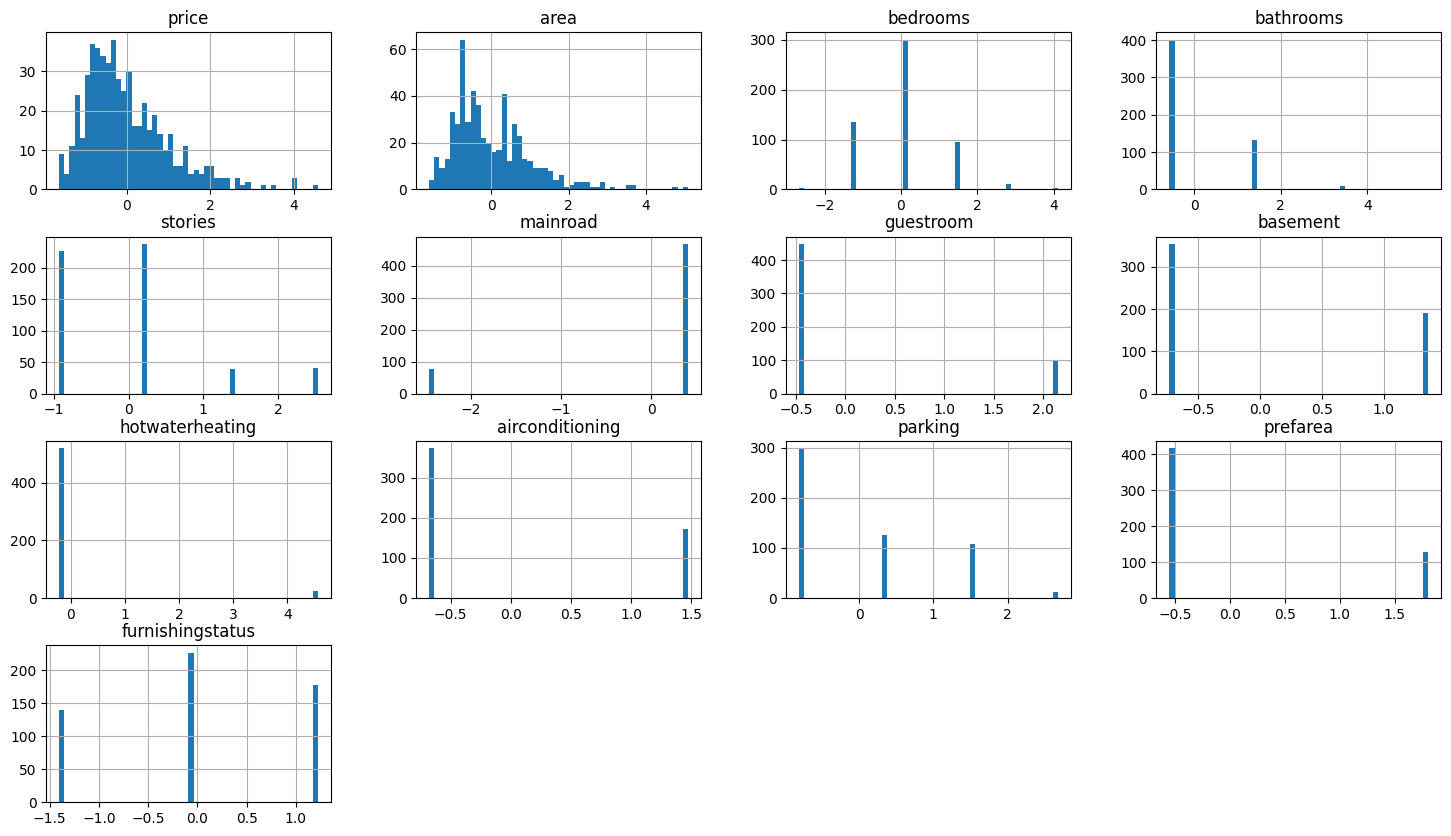

In [42]:
#Histograms: To show the distribution of individual features.
dataset.hist(bins=50,figsize=(18,10))
plt.show()

Scatter Plots For price
--------------------------------------------------


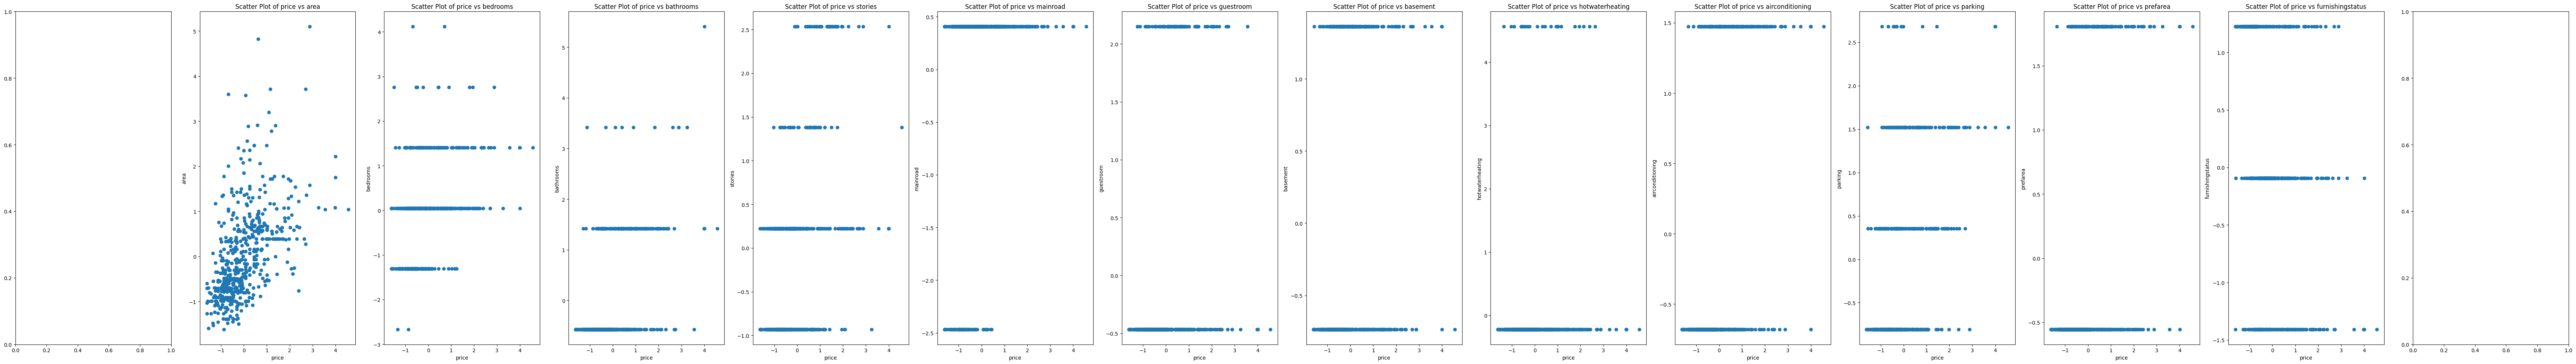

Scatter Plots For area
--------------------------------------------------


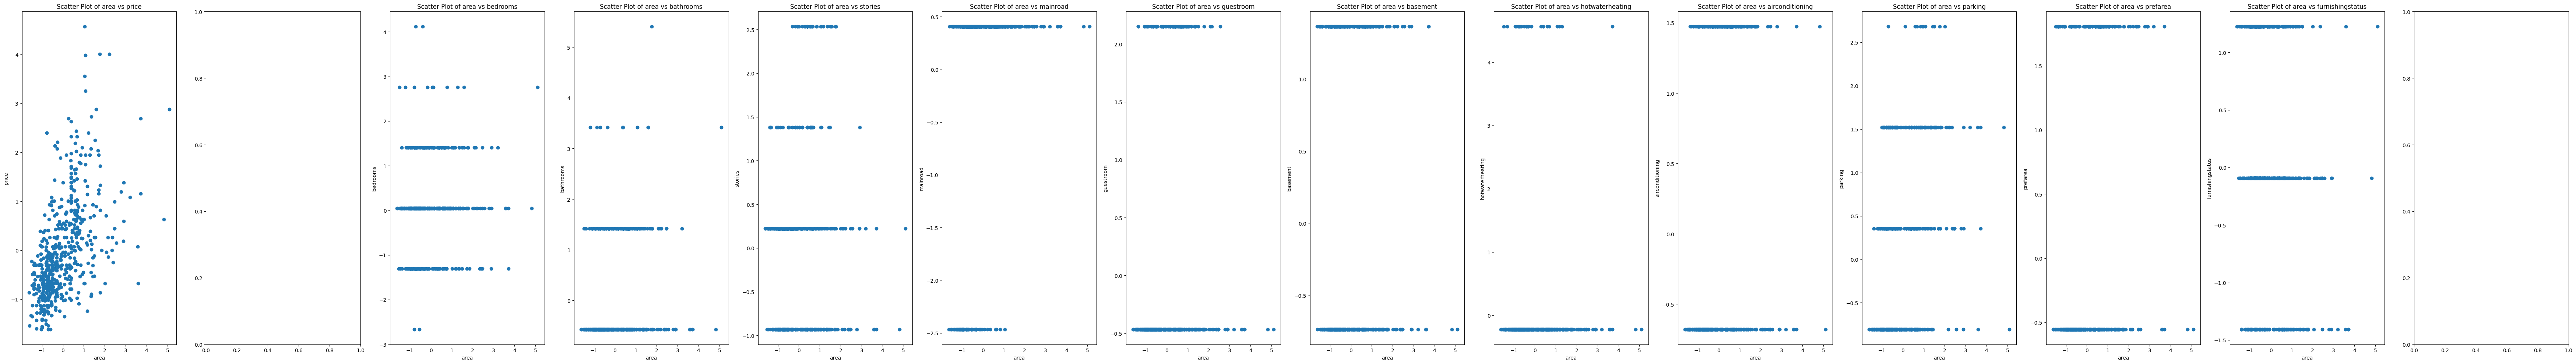

Scatter Plots For bedrooms
--------------------------------------------------


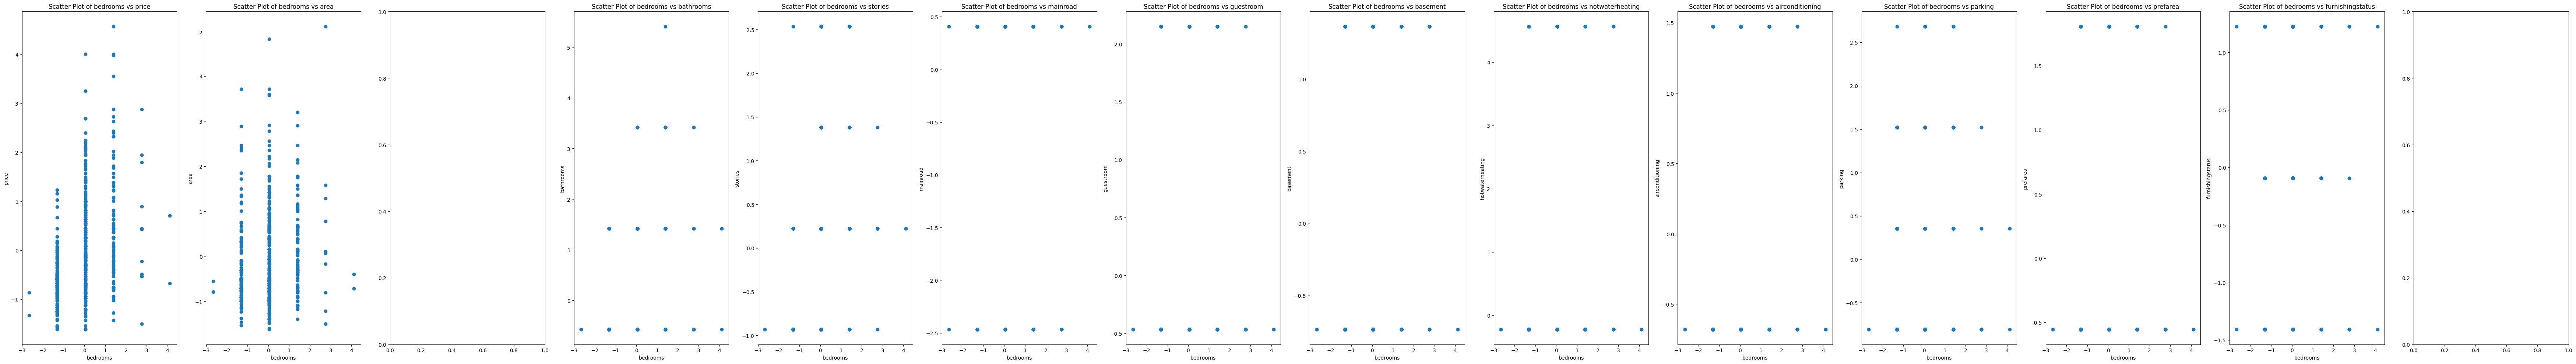

Scatter Plots For bathrooms
--------------------------------------------------


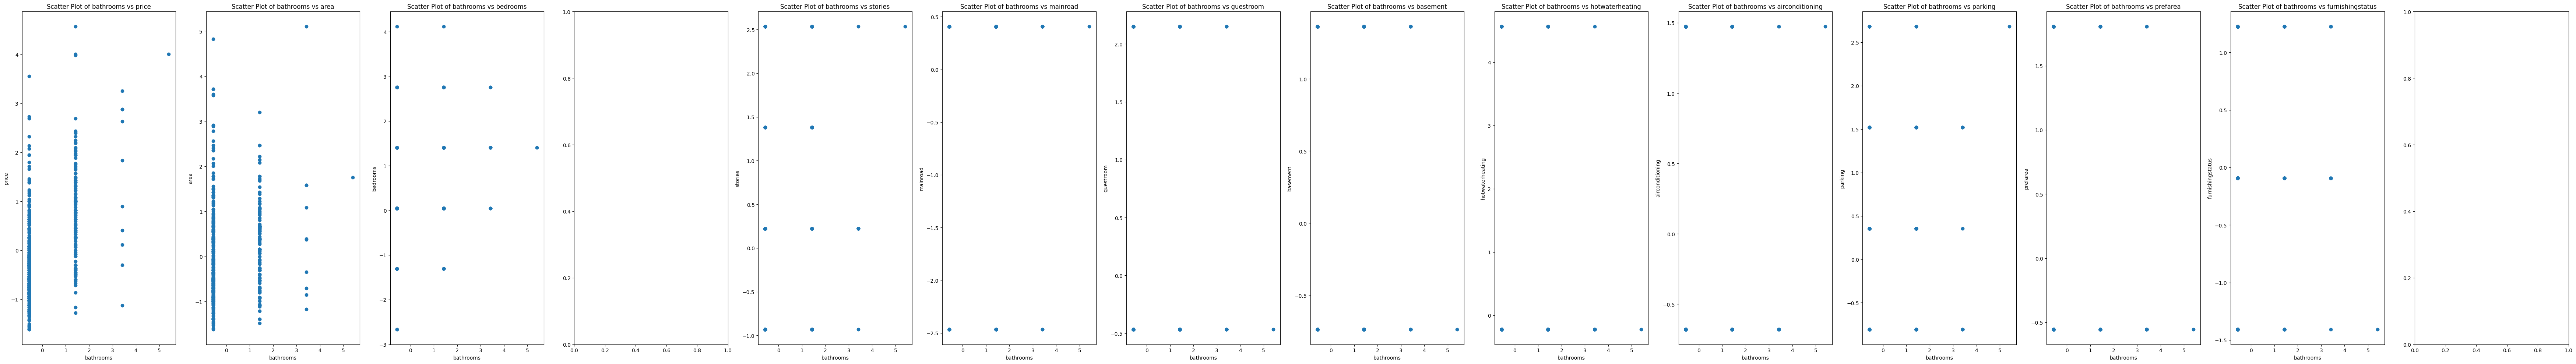

Scatter Plots For stories
--------------------------------------------------


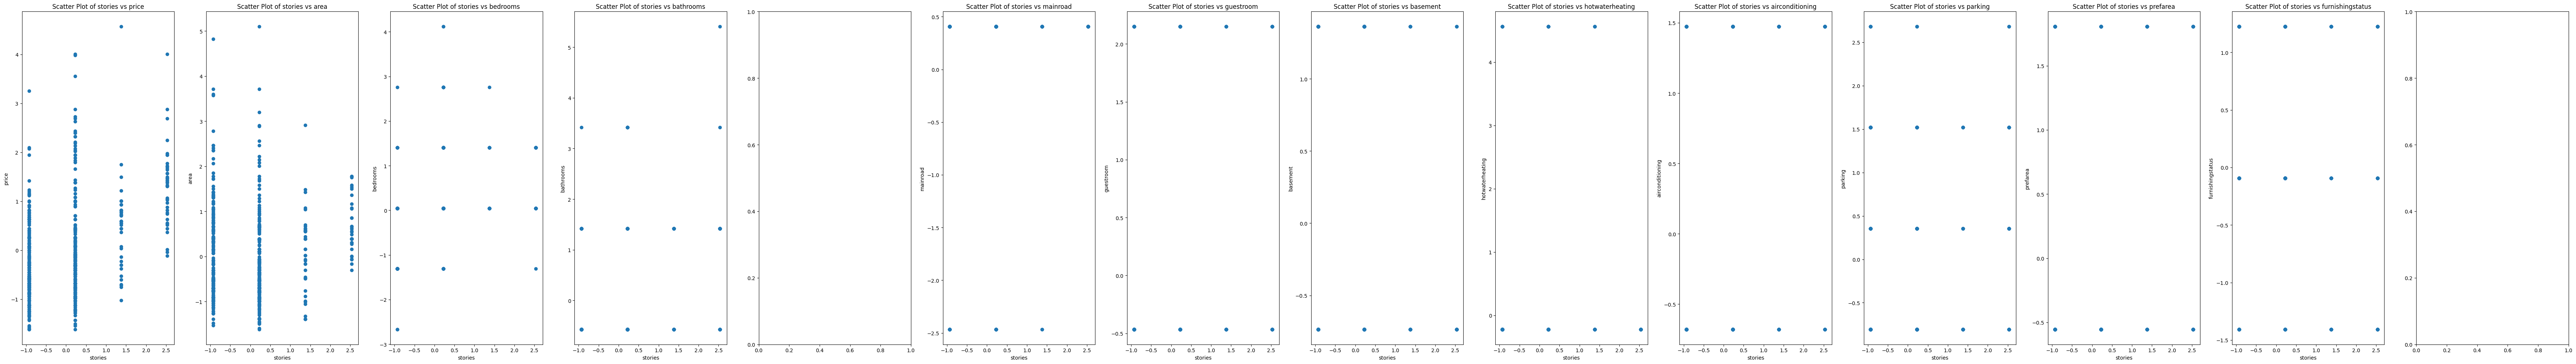

Scatter Plots For mainroad
--------------------------------------------------


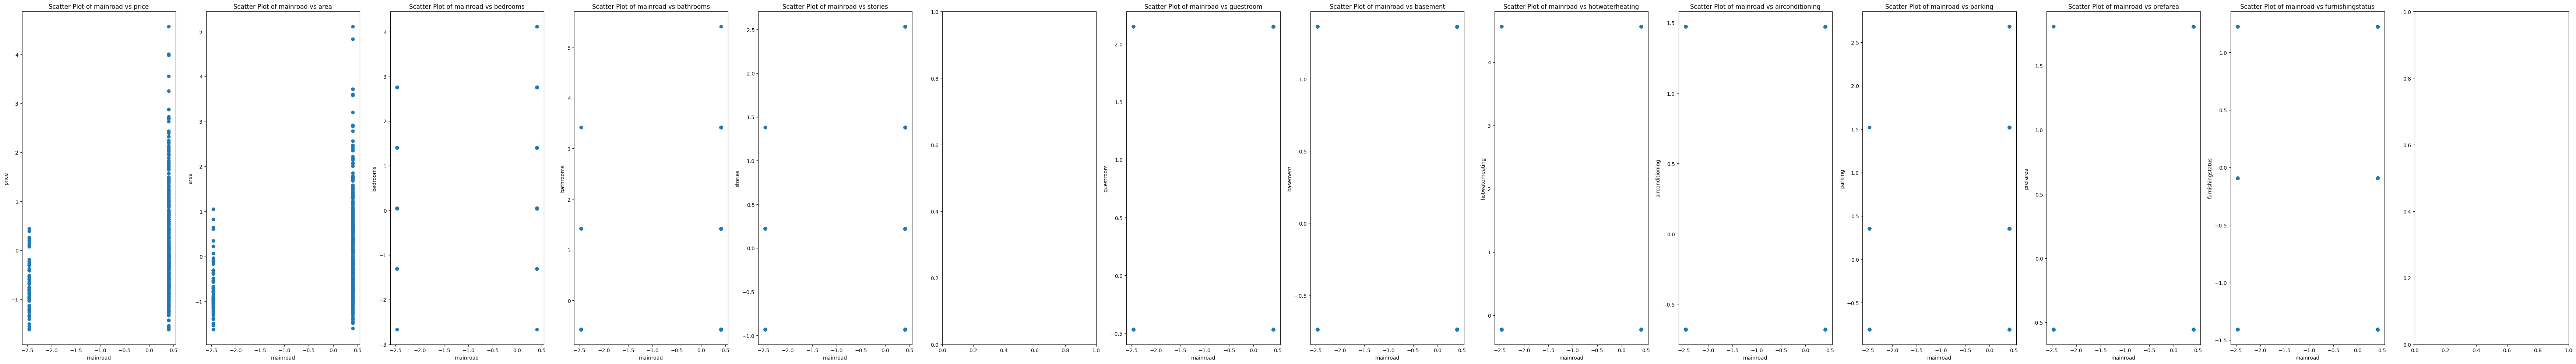

Scatter Plots For guestroom
--------------------------------------------------


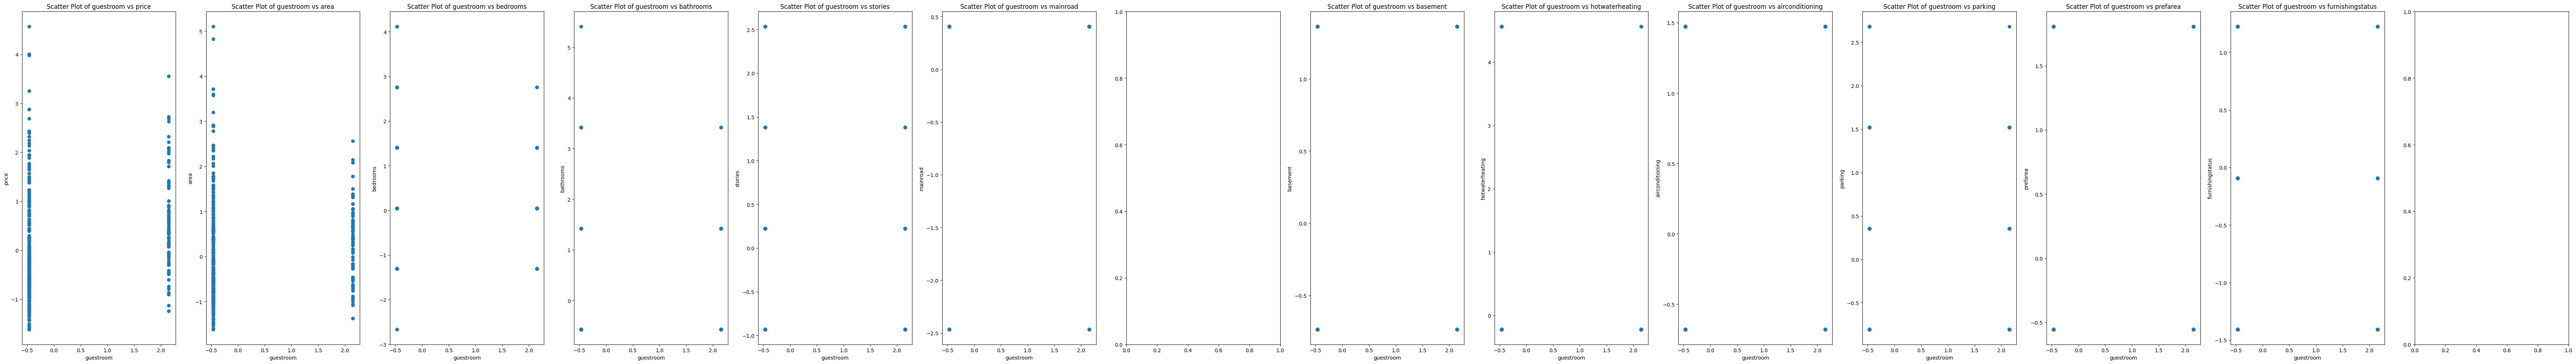

Scatter Plots For basement
--------------------------------------------------


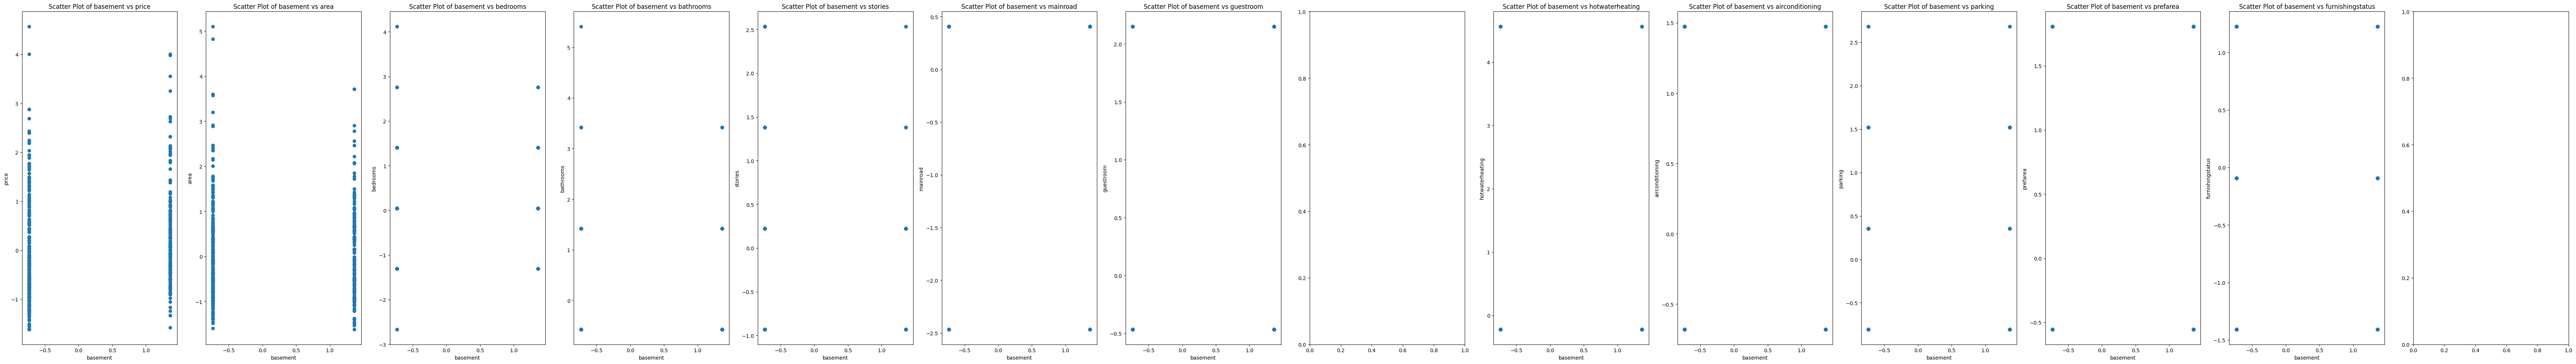

Scatter Plots For hotwaterheating
--------------------------------------------------


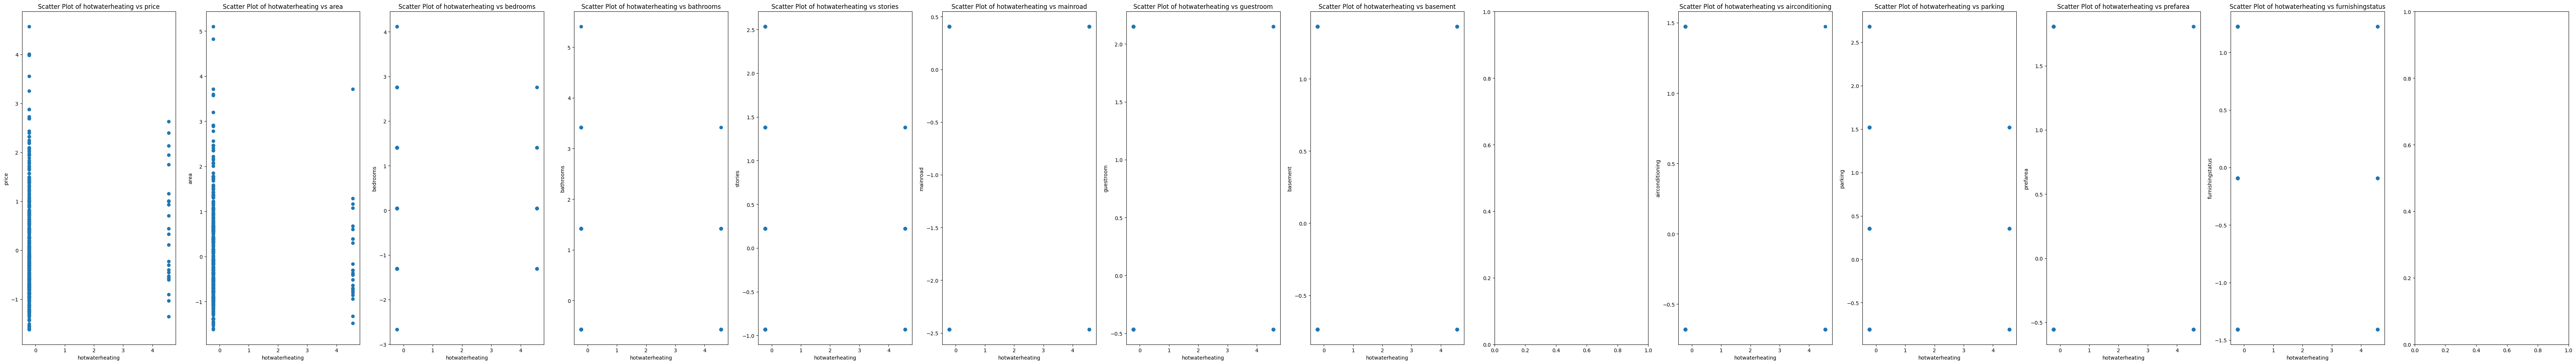

Scatter Plots For airconditioning
--------------------------------------------------


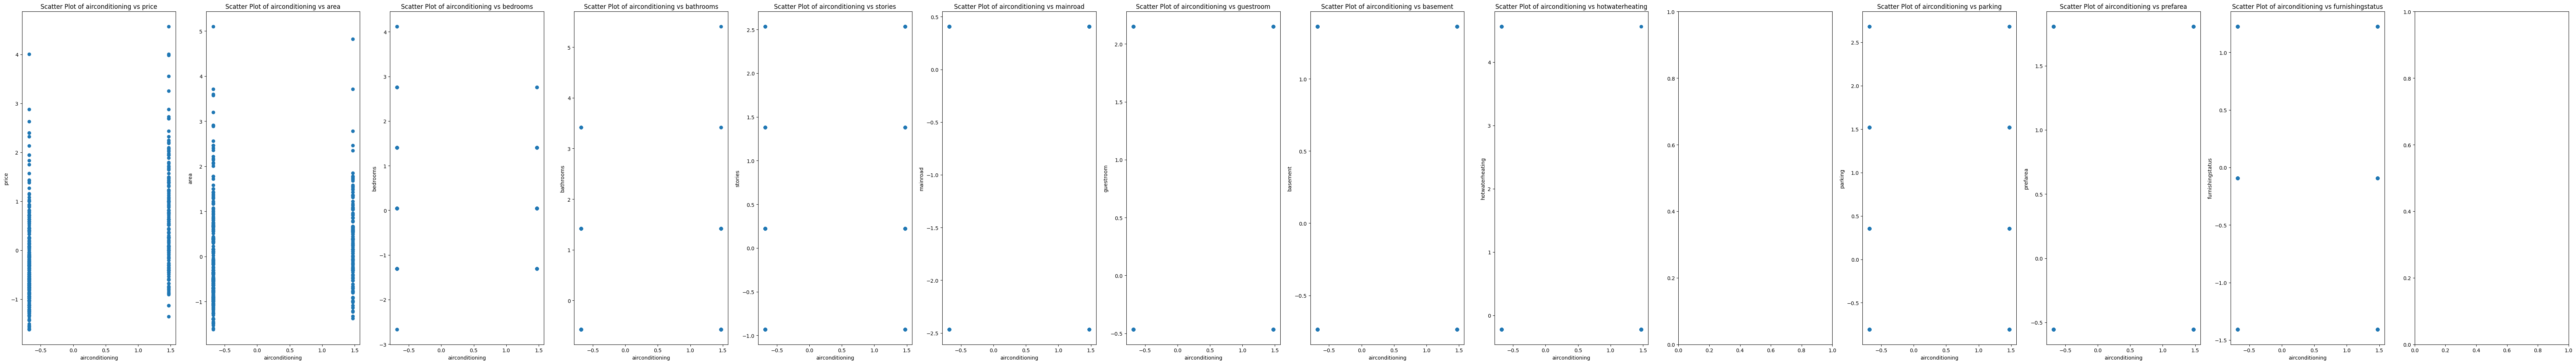

Scatter Plots For parking
--------------------------------------------------


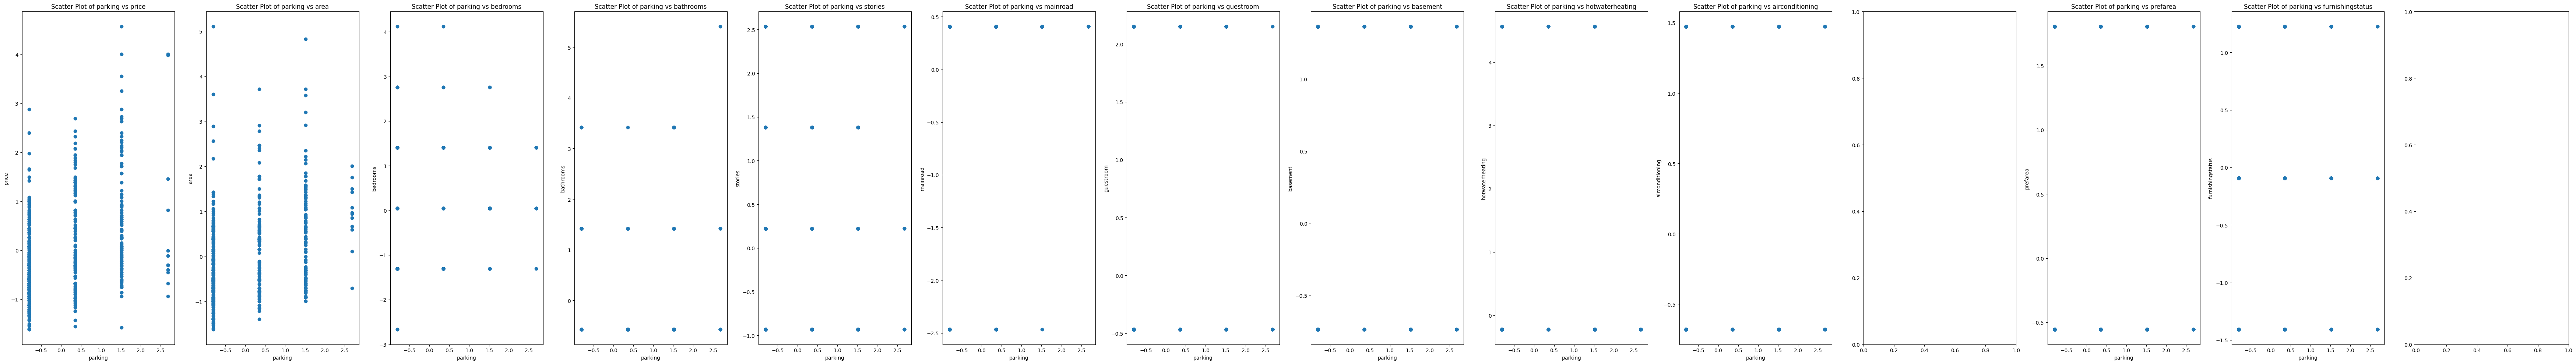

Scatter Plots For prefarea
--------------------------------------------------


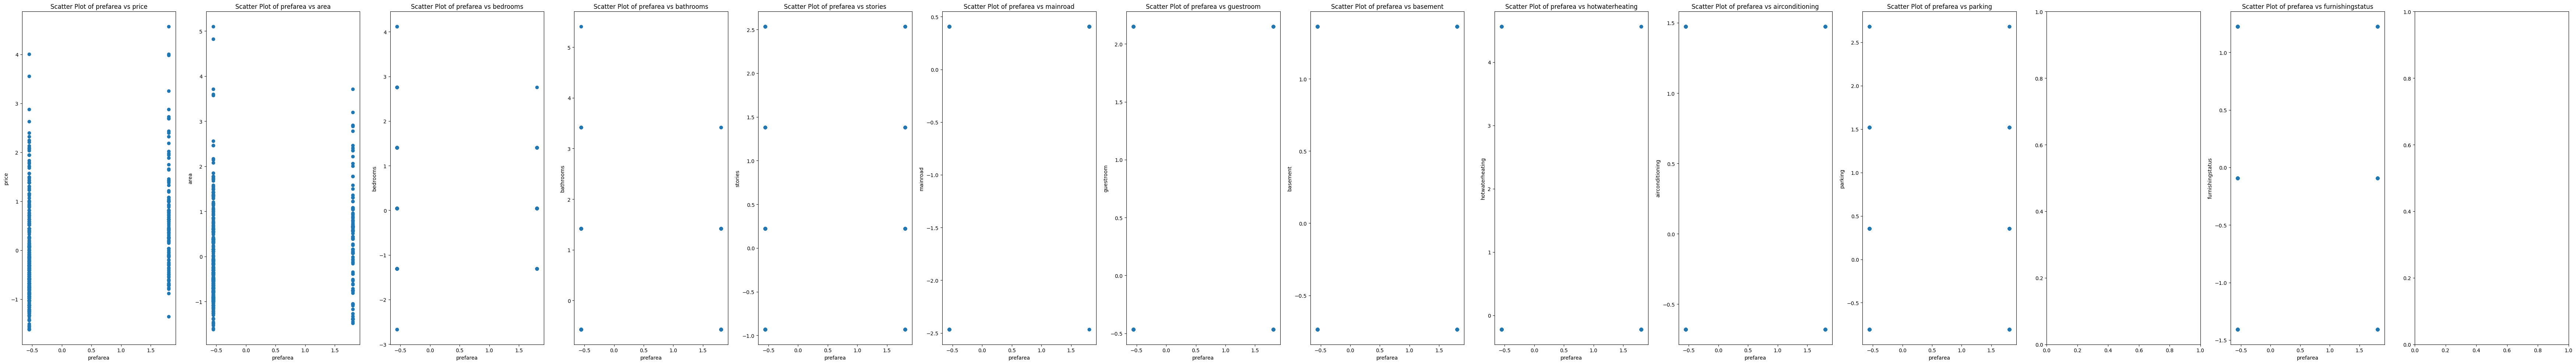

Scatter Plots For furnishingstatus
--------------------------------------------------


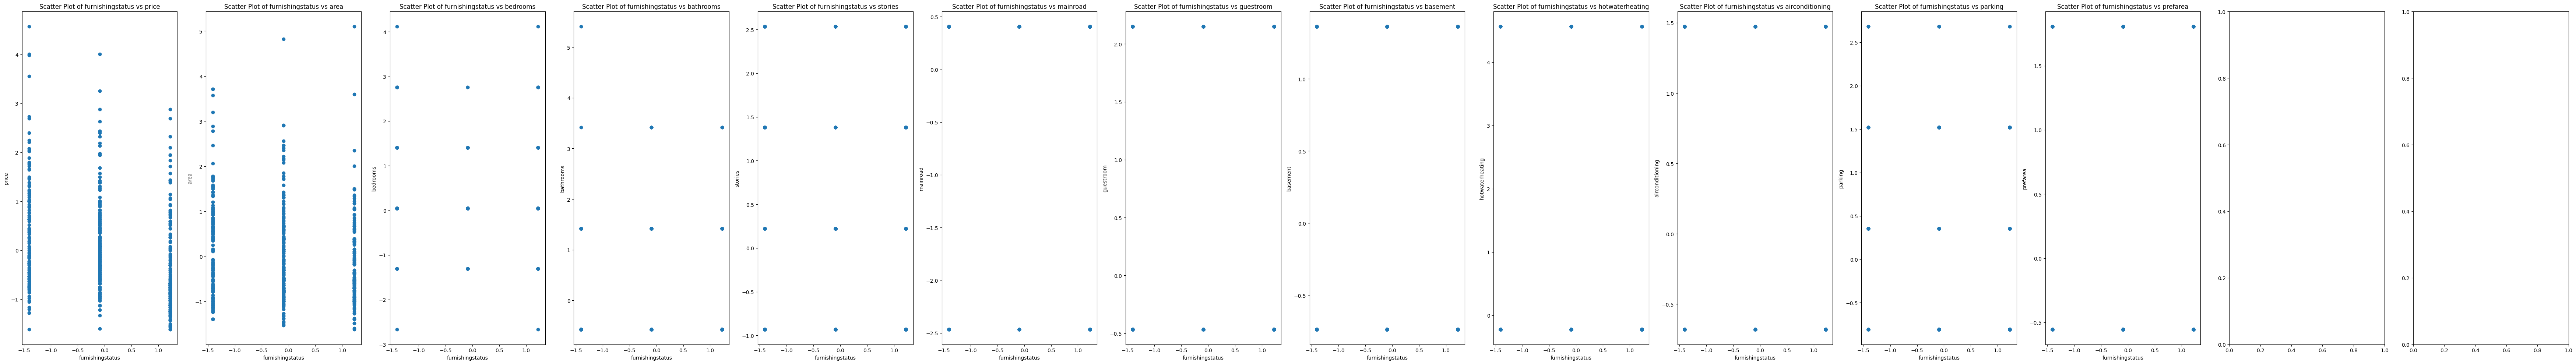

In [43]:
#Scatter Plots: To show relationships between pairs of features.:

for col in dataset.columns:
    print(f'Scatter Plots For {col}')
    print('-'*50)
    fig, axes = plt.subplots(1, 14, figsize=(70, 10))

    for i, y_feature in enumerate(dataset.columns):
      if col == y_feature:
        continue
      else:
        axes[i].scatter(dataset[col] , dataset[y_feature])
        axes[i].set_xlabel(col)
        axes[i].set_ylabel(y_feature)
        axes[i].set_title(f'Scatter Plot of {col} vs {y_feature}')
    fig.subplots_adjust(hspace=10.0, wspace=10.0)
    plt.tight_layout()
    plt.show()

The Box Plot for price is --------------------------------------------------


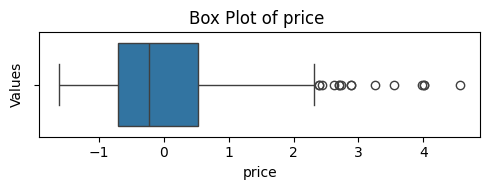

The Box Plot for area is --------------------------------------------------


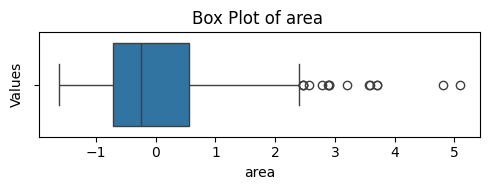

The Box Plot for bedrooms is --------------------------------------------------


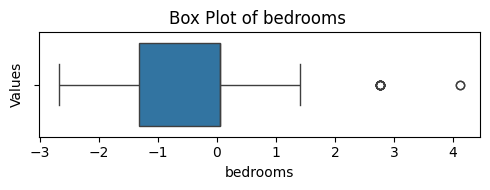

The Box Plot for bathrooms is --------------------------------------------------


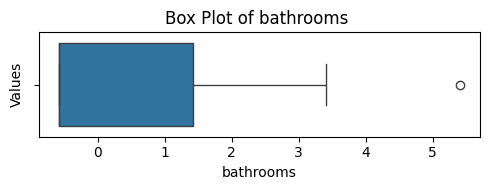

The Box Plot for stories is --------------------------------------------------


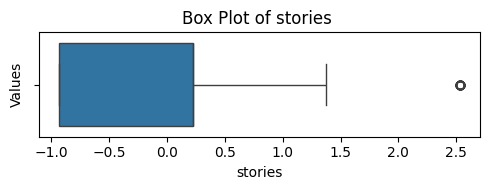

The Box Plot for mainroad is --------------------------------------------------


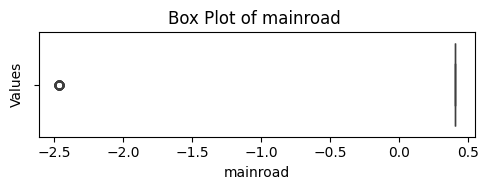

The Box Plot for guestroom is --------------------------------------------------


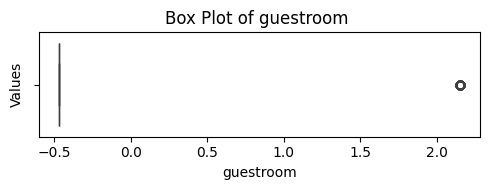

The Box Plot for basement is --------------------------------------------------


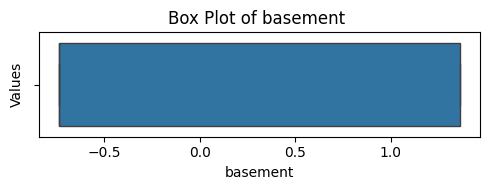

The Box Plot for hotwaterheating is --------------------------------------------------


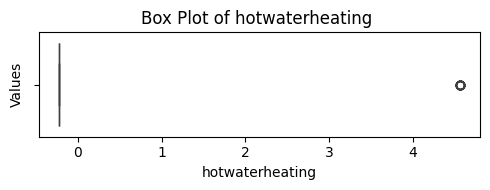

The Box Plot for airconditioning is --------------------------------------------------


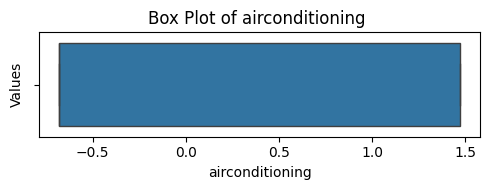

The Box Plot for parking is --------------------------------------------------


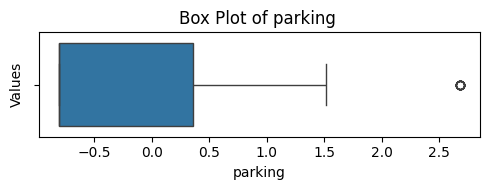

The Box Plot for prefarea is --------------------------------------------------


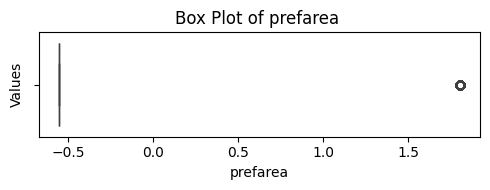

The Box Plot for furnishingstatus is --------------------------------------------------


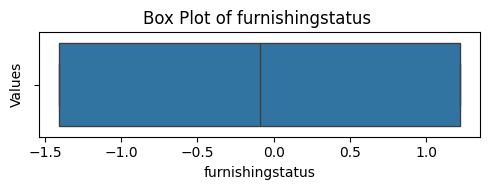

In [44]:
#Box Plots: To identify outliers and understand the spread of data.
for i,col in enumerate(dataset.columns):
  print(f"The Box Plot for {col} is {'-'*50}")
  fig = plt.subplots(figsize=(5,2))

  sns.boxplot(x=col,data=dataset)
  plt.xlabel(col)
  plt.ylabel("Values")
  plt.title(f'Box Plot of {col} ')


  plt.tight_layout()
  plt.show()

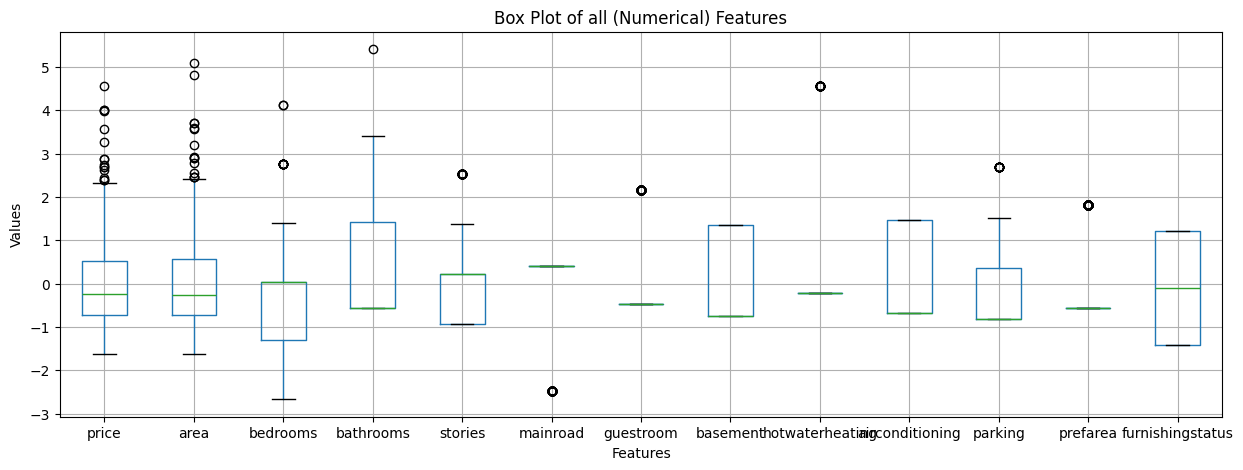

In [45]:
#Box Plots: To identify outliers and understand the spread of data.

dataset.boxplot(figsize=(15,5))
plt.title("Box Plot of all (Numerical) Features")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()

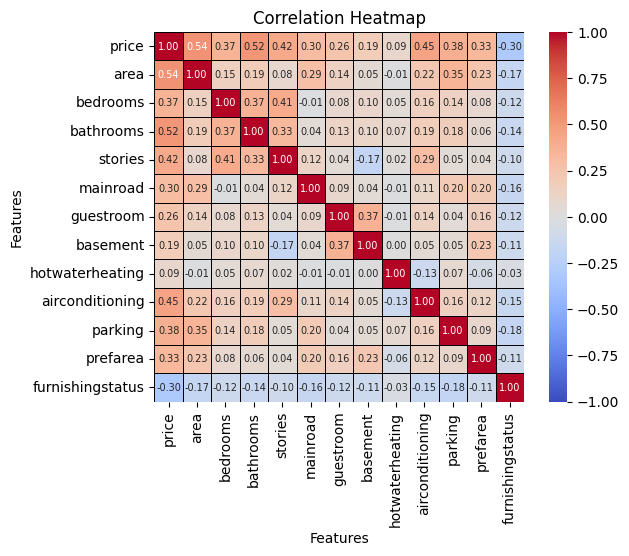

<Figure size 1000x1000 with 0 Axes>

In [46]:
#Correlation Heatmaps: To visualize correlations between features.
sns.heatmap(cor_mat, annot=True, annot_kws={'fontsize':7} ,cmap='coolwarm', fmt='.2f', robust=True, square=True, center=0 , linewidths=0.5, linecolor='Black',vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.xlabel("Features")
plt.ylabel("Features")
plt.figure(figsize=(10,10))
plt.show()

In [49]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [51]:
y_pred = model.predict(x_test)

In [52]:
y_pred

array([ 8.52776850e-01,  8.07028214e-01,  9.22949321e-01,  3.98110047e-01,
       -3.13240679e-01, -1.00667970e+00, -1.07196570e+00,  1.41578070e+00,
       -1.24410948e+00, -1.57702118e-01, -5.13009815e-01, -5.99028307e-01,
       -2.50742349e-02,  1.21704661e-02,  2.91467804e-01,  1.72121394e+00,
       -2.80887054e-01, -7.05543885e-01,  1.04612582e+00, -1.10669724e+00,
       -1.20745947e-01,  2.44334152e-01,  2.63621603e-01, -7.12159319e-01,
        3.23603374e-01,  1.19870286e+00, -1.04698290e+00,  1.39552892e+00,
        1.54640823e+00, -1.88708232e-01,  1.51855870e+00,  1.00688649e+00,
        1.29687361e-01, -1.11495398e-01,  7.05409196e-01, -8.07182392e-02,
        9.50279603e-01, -7.28454579e-01,  1.31280796e-01,  5.18111832e-01,
       -4.36431339e-01, -7.96122430e-01, -5.83891273e-01, -1.12726889e-01,
        8.61303430e-01, -7.55988916e-01, -3.74714568e-03, -1.10073519e+00,
       -1.12335772e+00, -7.66339959e-01,  9.43826804e-02, -1.41009751e-01,
       -1.12539275e+00, -

In [54]:
#Evaluation Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [55]:
print("\nModel Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.4f}")


Model Performance:
Mean Squared Error (MSE): 0.46
Mean Absolute Error (MAE): 0.48
R² Score: 0.6183


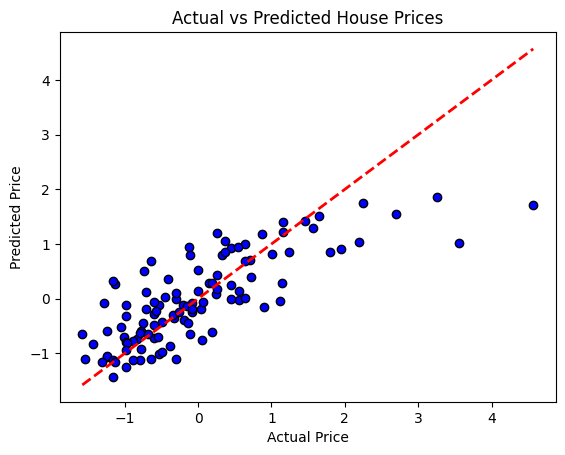

In [56]:
plt.scatter(y_test, y_pred, color="blue", edgecolors="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()

#Gradient Descent:
Now let’s talk about the real game — the Gradient Descent algorithm, which is used to find the best weights that form the best-fit line.

This algorithm works by minimizing the loss function (e.g., MSE, MAE, etc.).

Mathematically, the update rule can be written as:

***w=w−η⋅∇L(w)***

Here:
w = weights (parameters of the model)

η = learning rate (controls the size of the step we take)

∇L(w) = gradient (derivative of the loss function with respect to the weights)

The idea is that we update the weights by subtracting the gradient multiplied by the learning rate. The gradient shows the direction of the steepest increase of the loss function.By moving in the opposite direction (downhill), we reduce the loss. The learning rate decides how big or small our steps are:
1. If it’s too large → we might overshoot and fail to converge.

2. If it’s too small → training becomes very slow.

This iterative process continues until the loss is minimized (or is sufficiently small).


In [60]:
def gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    m = len(y)  # number of samples
    X_b = np.c_[np.ones((m, 1)), X] #add bias
    theta = np.random.randn(X_b.shape[1], 1) # Initialize weights randomly

    losses = []
    for i in range(n_iterations):
        y_pred = X_b.dot(theta)  # Predictions
        gradients = 2/m * X_b.T.dot(y_pred - y)  # Gradient (derivative of MSE) -> where (y_pred-y) is the loss
        theta -= learning_rate * gradients  # Update weights
        loss = np.mean((y_pred - y) ** 2) # Compute MSE loss
        losses.append(loss)
    return theta, losses


In [66]:
X = dataset.drop(columns=["price"]).values          # shape (m, n)
y = dataset["price"].values.reshape(-1, 1)          # shape (m, 1)

In [67]:
X.shape

(545, 12)

In [68]:
y.shape

(545, 1)

In [69]:
gradient_descent(X,y)

(array([[-1.80537994e-09],
        [ 2.83045454e-01],
        [ 4.70410208e-02],
        [ 2.65621587e-01],
        [ 2.09043210e-01],
        [ 7.88110799e-02],
        [ 6.09553191e-02],
        [ 9.14922892e-02],
        [ 9.77142249e-02],
        [ 2.12244561e-01],
        [ 1.28899285e-01],
        [ 1.46760210e-01],
        [-8.67784394e-02]]),
 [np.float64(13.88028425527495),
  np.float64(13.335265311624875),
  np.float64(12.817525742465472),
  np.float64(12.325325988323149),
  np.float64(11.857061060592697),
  np.float64(11.411248861018699),
  np.float64(10.986519574821505),
  np.float64(10.581606036139304),
  np.float64(10.195334974136298),
  np.float64(9.826619056876106),
  np.float64(9.474449657968327),
  np.float64(9.137890278146012),
  np.float64(8.816070560395403),
  np.float64(8.508180843102885),
  np.float64(8.213467200967372),
  np.float64(7.931226928202942),
  np.float64(7.660804422875696),
  np.float64(7.401587435124043),
  np.float64(7.153003645542969),
  np.float64

In [70]:
theta, losses = gradient_descent(X, y, learning_rate=0.01, n_iterations=500)
print("Learned Parameters (theta):")
print(theta)
print("\nFinal Loss (MSE):", losses[-1])


Learned Parameters (theta):
[[-3.24403644e-05]
 [ 2.84925724e-01]
 [ 4.61360014e-02]
 [ 2.64305378e-01]
 [ 2.11606338e-01]
 [ 7.70060182e-02]
 [ 6.17395944e-02]
 [ 9.15864737e-02]
 [ 9.71757468e-02]
 [ 2.10094950e-01]
 [ 1.29117117e-01]
 [ 1.46936515e-01]
 [-8.73058976e-02]]

Final Loss (MSE): 0.31994319821946743


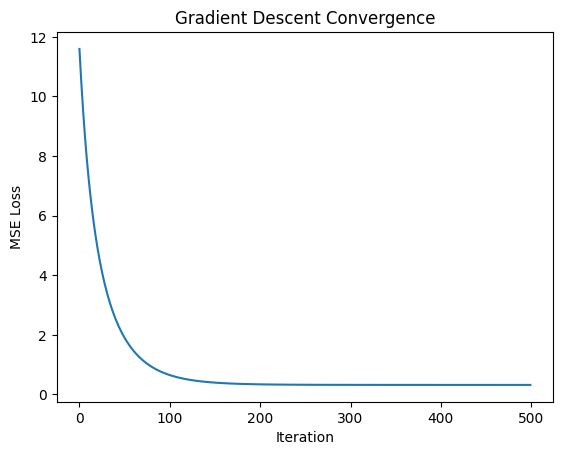

In [72]:
#visualizing the whole thing:
import matplotlib.pyplot as plt

# Plot loss over iterations
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.title("Gradient Descent Convergence")
plt.show()


In [73]:
def predict(X, theta):
    m = X.shape[0]
    X_b = np.c_[np.ones((m, 1)), X]  # add bias
    return X_b.dot(theta)

In [74]:
y_pred = predict(X, theta)
print("First 5 predictions:", y_pred[:5].ravel())
print("First 5 actual values:", y[:5].ravel())


First 5 predictions: [1.83765143 3.14055187 1.48985166 1.94596873 1.07375432]
First 5 actual values: [4.56636513 4.00448405 4.00448405 3.98575468 3.55497918]


In [75]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [76]:
# Metrics
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

In [77]:
print("Model Performance:")
print(f"MSE  : {mse:.2f}")
print(f"MAE  : {mae:.2f}")
print(f"R²   : {r2:.4f}")


Model Performance:
MSE  : 0.32
MAE  : 0.42
R²   : 0.6801


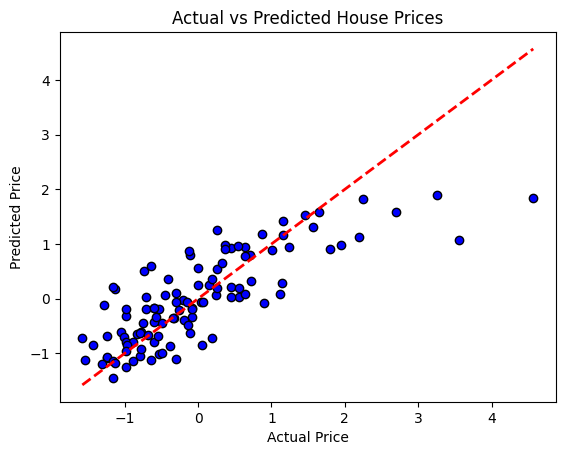

In [83]:
y_test_flat = np.array(y_test).flatten()
y_pred_flat = np.array(y_pred).flatten()

plt.scatter(y_test_flat, y_pred_flat, color="blue", edgecolors="k")
plt.plot([y_test_flat.min(), y_test_flat.max()],
         [y_test_flat.min(), y_test_flat.max()],
         "r--", lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [80]:
print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)

y_test shape: (109,)
y_pred shape: (545, 1)


In [82]:
y_pred = predict(x_test, theta)

In [84]:
from sklearn.metrics import r2_score

accuracy = r2_score(y_test, y_pred) * 100
print(f"Model Accuracy: {accuracy:.2f}%")


Model Accuracy: 64.60%


now lets make the accuracy better:

In [87]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [88]:
def gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    m = len(y)
    X_b = np.c_[np.ones((m, 1)), X]  # add bias column
    theta = np.random.randn(X_b.shape[1], 1)  # random init

    losses = []
    for i in range(n_iterations):
        y_pred = X_b.dot(theta)
        gradients = 2/m * X_b.T.dot(y_pred - y)
        theta -= learning_rate * gradients
        loss = np.mean((y_pred - y) ** 2)
        losses.append(loss)

    y_final_pred = X_b.dot(theta)

    mse = mean_squared_error(y, y_final_pred)
    mae = mean_absolute_error(y, y_final_pred)
    r2 = r2_score(y, y_final_pred)

    metrics = {"MSE": mse, "MAE": mae, "R2": r2}

    return theta, losses, metrics


In [89]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

theta, losses, metrics = gradient_descent(X_scaled, y, learning_rate=0.1, n_iterations=1000)

print("Metrics:", metrics)
print(f"Model Accuracy: {metrics['R2']*100:.2f}%")


Metrics: {'MSE': 0.3199308623829959, 'MAE': 0.41535897748145634, 'R2': 0.6800691376170039}
Model Accuracy: 68.01%


In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

theta, losses, metrics_train = gradient_descent(X_train, y_train, learning_rate=0.1, n_iterations=1000)

# Predict on test
y_pred = predict(X_test, theta)

from sklearn.metrics import r2_score
test_r2 = r2_score(y_test, y_pred)
print("Train R²:", metrics_train["R2"])
print("Test R²:", test_r2)



Train R²: 0.6854429472843789
Test R²: 0.6494754192267794


In [91]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

theta, losses, metrics = gradient_descent(X_poly, y, learning_rate=0.05, n_iterations=2000)
print("Polynomial Regression R²:", metrics["R2"]*100, "%")


Polynomial Regression R²: -inf %


/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:127: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/tmp/ipython-input-2264075289.py:11: RuntimeWarning: overflow encountered in square
  loss = np.mean((y_pred - y) ** 2)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:570: RuntimeWarning: overflow encountered in square
  output_errors = _average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1275: RuntimeWarning: overflow encountered in square
  numerator = xp.sum(weight * (y_true - y_pred) ** 2, axis=0)
